In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('McDonalds Menu.csv')  # read the data set
dataset.sample(5)  # show first few rows

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
109,Desserts,Strawberry Sundae,6.3 oz (178 g),280,60,6.0,10,4.0,20,0.0,...,49,16,0,0,45,6,8,4,20,0
44,Beef & Pork,Quarter Pounder with Bacon & Cheese,8 oz (227 g),600,260,29.0,45,13.0,63,1.5,...,48,16,3,12,12,37,6,15,25,30
227,Coffee & Tea,Frappé Caramel (Medium),16 fl oz cup,550,200,23.0,35,15.0,73,1.0,...,79,26,0,0,71,9,20,0,30,2
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,42,14,3,12,4,20,6,8,15,15
86,Salads,Premium Bacon Ranch Salad with Grilled Chicken,8.5 oz (241 g),220,80,8.0,13,4.0,20,0.0,...,8,3,2,10,4,29,110,30,15,8


In [3]:
# find mean calories overall
menu_mean = dataset['Calories'].mean()
print(f"Mean calories: {menu_mean}")

Mean calories: 368.2692307692308


In [4]:
# find item name and calories of most calorie item
most_calorie_item = dataset.nlargest(1, 'Calories')
print(f"Most caloric item: {most_calorie_item['Item'].values[0]} with {most_calorie_item['Calories'].values[0]} calories")

Most caloric item: Chicken McNuggets (40 piece) with 1880 calories


In [5]:
# make a new data frame with categories column and average calories for each category
categories = dataset.groupby('Category')['Calories'].mean().round(2)
categories.reset_index(inplace=False)

,Category,Calories
0,Beef & Pork,494.00
1,Beverages,113.70
2,Breakfast,526.67
3,Chicken & Fish,552.96
4,Coffee & Tea,283.89
5,Desserts,222.14
6,Salads,270.00
7,Smoothies & Shakes,531.43
8,Snacks & Sides,245.77


Text(5, 378.2692307692308, 'Menu average: 368.27')

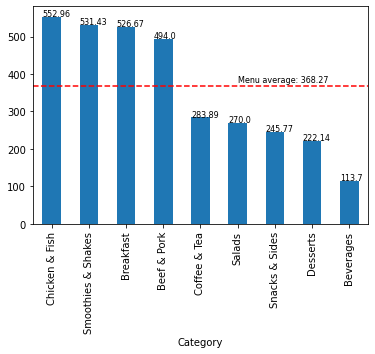

In [6]:
# sort categories by calories
categories = categories.sort_values(ascending=False)

# plot categories as bar chart
categories.plot(kind='bar')
for index, data in enumerate(categories):
    plt.text(x=index-0.25 , y =data+2 , s=f"{round(data, 2)}" , fontdict=dict(fontsize=8))
# plot menu mean line on top of categories and add label to it
plt.axhline(y=menu_mean, color='r', linestyle='--')
plt.text(x=5, y=menu_mean+10, s=f"Menu average: {round(menu_mean, 2)}", fontdict=dict(fontsize=8))



In [15]:
# pie chart to compare average calories of each category
# add Category and Calories columns to data frame
categories['Category'] = categories.index
categories['Calories'] = categories[1]
categories_pie['Category'] = categories_pie['Category'].str.replace('(', '')
plt.pie(categories['Calories'], labels=categories['Category'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

KeyError: 'Category'

#### Results:
Top 3 categories in terms of average calories:
<ol>
<li>Chicken & Fish</li>
<li>Smoothies & Shakes</li>
<li>Breakfast</li>
</ol>
Bottom 3 Categories in terms of average calories:
<ol>
<li>Beverages</li>
<li>Desserts</li>
<li>Snacks & Sides</li>
</ol>